# Decision Trees & Random Forests


**Problem 1.** The dataset income_data.csv represents an extract from a commercial marketing database. You
can find the column description in income_info.txt. The goal is to fit a decision tree to predict the annual income
of a household from 13 demographic attributes and interpret the results. We want to use Python to construct a
decision tree to fulfill this task. Please answer the following questions.

**Data Set Up and Load**

In [ ]:

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn tools:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Mount Google Drive inside Colab so you can access your files
from google.colab import drive
drive.mount('/content/drive')

# Double-check file exists
!ls "/content/drive/My Drive/Colab Notebooks"

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/income_data.csv", header=None)

# Assign column names based on income_info.txt
cols = ["Annual Income", "Sex", "Marital Status", "Age", "Education", "Occupation",
        "HowLongLived", "Dual Incomes", "PersonsInHousehold", "PersonsUnder18",
        "Householder Status", "TypeOfHome", "Ethnic Classification", "Language"]
df.columns = cols

# Drop rows with missing values
df = df.dropna()

# Features & target
X = df.drop("Annual Income", axis=1)
y = df["Annual Income"]



Mounted at /content/drive
'Assignment 2: Okoroafor & Herrera.ipynb'
'Copy of Okoroafor Adanma, Dalia Herrera ISM 6251.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 Dalia_Assignment_2.ipynb
 hflights.csv
 income_big.csv
 income_data.csv
 income_info.txt
'Lab 2 DataManipulation.ipynb'
'Lab 2 DecisionTree.ipynb'
'Okoroafor Adanma, Dalia Herrera ISM 6251.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb


**Problem 1 (a.)**
Without using a decision tree, investigate the relation between the annual income and the other
demographic predictors. Write a short summary of your observations. Which variables seem to be useful
for predicting income? Why?


--- Part a: Correlation Analysis ---
Annual Income            1.000000
Education                0.463418
Age                      0.403819
Dual Incomes             0.386481
Ethnic Classification    0.114497
HowLongLived             0.088499
Sex                     -0.053487
PersonsInHousehold      -0.080501
Language                -0.098627
PersonsUnder18          -0.101753
TypeOfHome              -0.193342
Occupation              -0.362258
Marital Status          -0.489520
Householder Status      -0.521194
Name: Annual Income, dtype: float64

Sex vs Annual Income:
Annual Income         1         2         3         4         5         6  \
Sex                                                                         
1              0.154874  0.075644  0.075644  0.089012  0.082491  0.130095   
2              0.204778  0.077973  0.071672  0.090575  0.071935  0.117354   

Annual Income         7         8         9  
Sex                                          
1              0.121291  0

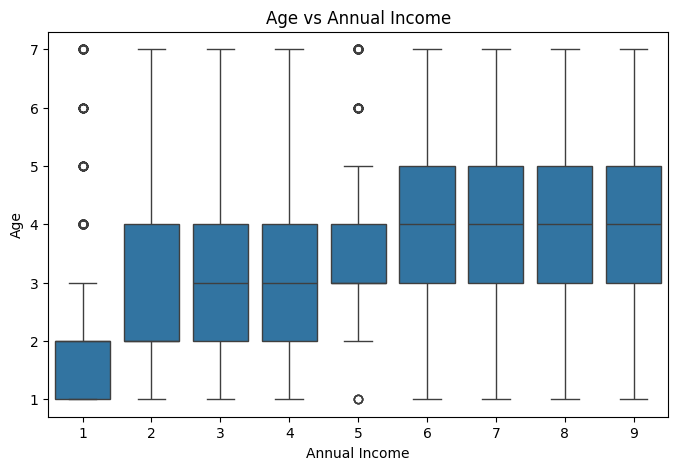

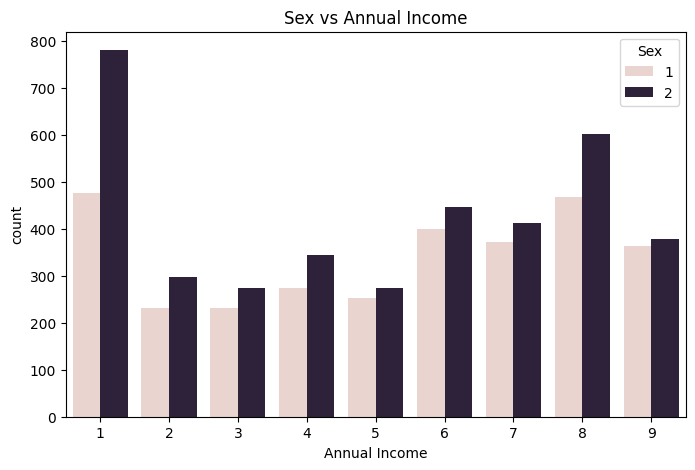

In [ ]:
# a: Investigate relation without decision tree

print("\n--- Part a: Correlation Analysis ---")
print(df.corr(numeric_only=True)["Annual Income"].sort_values(ascending=False))

# Crosstabs
print("\nSex vs Annual Income:")
print(pd.crosstab(df["Sex"], y, normalize="index"))

print("\nMarital Status vs Annual Income:")
print(pd.crosstab(df["Marital Status"], y, normalize="index"))

print("\nOccupation vs Annual Income:")
print(pd.crosstab(df["Occupation"], y, normalize="index"))

# Example plots
plt.figure(figsize=(8,5))
sns.boxplot(x="Annual Income", y="Age", data=df)
plt.title("Age vs Annual Income")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="Annual Income", hue="Sex", data=df)
plt.title("Sex vs Annual Income")
plt.show()



**Problem 1 (b.)** Divide your data into 60% train and 40% test. Create the default C&R decision tree. How many leaves are in the tree? What is the size of each leaf node?

In [ ]:
# b: Balanced Decision Tree with 60/40 split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

tree = DecisionTreeClassifier(
    max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
)
tree.fit(X_train, y_train)

leaf_ids = tree.apply(X_train)
sizes = pd.Series(leaf_ids).value_counts().sort_index()

print("Leaf sizes (train):")
print(sizes.to_string())
print("\n--- Part b: Balanced Decision Tree ---")
print(f"Number of leaves: {tree.get_n_leaves()}")

train_acc = tree.score(X_train, y_train)
test_acc = tree.score(X_test, y_test)
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")


Leaf sizes (train):
5        5
7        7
11       5
12       5
14       8
15       9
16       6
17       6
19       5
20       5
23       7
24     289
26       7
28       6
31       5
32       9
33       5
43      50
44      45
46      12
47      33
50      30
51       8
53      29
54       6
57       9
58       6
60       8
62      11
63       8
65       7
69       7
70       7
72      21
73      81
76      36
77       5
79      16
80      12
86      20
87       8
89       6
90      35
93     115
94      54
96       7
97     101
101      6
102      5
103      8
105      7
106      7
109      5
112      8
113     61
115      5
116      5
118     13
119      9
125      5
127     35
128      9
129      6
131      6
134     23
135      7
137      6
138      5
143     37
144      7
146      7
147     30
148      8
150      5
151      5
152     11
158      5
159      9
162     10
164      5
165      5
168      5
169      9
171     11
172      7
177     15
178     12
180      8
181     11
1

**Problem 1 (c.)** What are the major predictors of income? How are they related to your observations in part (a)? How well your decision tree can predict a household’s income in your training data?

In [ ]:
# c: Major Predictors of Income

tree_c = DecisionTreeClassifier(random_state=42)
tree_c.fit(X_train, y_train)

print("\n--- Part c: Feature Importances ---")
for name, importance in zip(X.columns, tree_c.feature_importances_):
    print(f"{name}: {importance:.3f}")
print(f"Training accuracy: {tree_c.score(X_train, y_train):.3f}")


--- Part c: Feature Importances ---
Sex: 0.053
Marital Status: 0.056
Age: 0.152
Education: 0.119
Occupation: 0.098
HowLongLived: 0.092
Dual Incomes: 0.032
PersonsInHousehold: 0.104
PersonsUnder18: 0.060
Householder Status: 0.043
TypeOfHome: 0.077
Ethnic Classification: 0.094
Language: 0.020
Training accuracy: 0.920


**Problem 1 (d.)** Give two decision rules that are useful for predicting income. Justify your choice.  

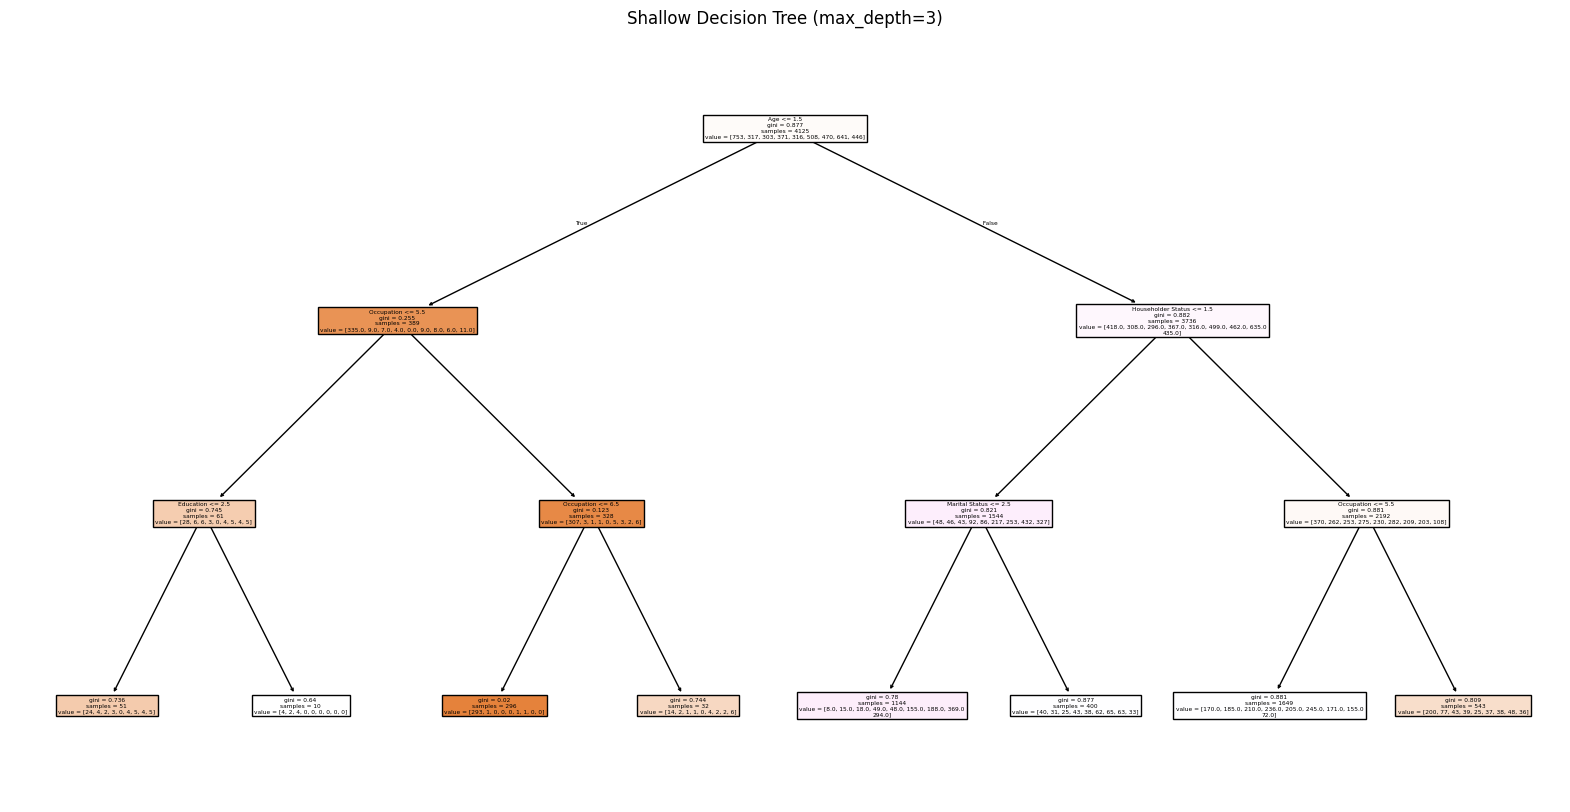

In [ ]:
# d: Two Decision Rules (shallow tree)


tree_d = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_d.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(tree_d, feature_names=list(X.columns), filled=True, max_depth=3)
plt.title("Shallow Decision Tree (max_depth=3)")
plt.show()


**Problem 1 (e.)** Using your decision tree, predict the annual income of the households in the test data. What is the error of your predictions?

In [ ]:
# e: Test Error (Decision Tree)

y_pred = tree_c.predict(X_test)
error = mean_absolute_error(y_test, y_pred)
test_acc = tree_c.score(X_test, y_test)
print("\n--- Part e: Decision Tree Test Error ---")
print(f"Test MAE: {error:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


--- Part e: Decision Tree Test Error ---
Test MAE: 1.844
Test Accuracy: 0.285


**Problem 1 (f.)** Describe the profile/characteristics of the households in your training data that are likely to have high income.

In [ ]:
# f: Profile of High-Income Households

high_income = df[df["Annual Income"] >= 8]
print("\n--- Part f: High-Income Household Profile ---")
print(high_income.describe())


--- Part f: High-Income Household Profile ---
       Annual Income          Sex  Marital Status          Age    Education  \
count    1812.000000  1812.000000     1812.000000  1812.000000  1812.000000   
mean        8.410044     1.541391        2.002208     3.990618     4.523179   
std         0.491977     0.498421        1.588889     1.375184     1.110172   
min         8.000000     1.000000        1.000000     1.000000     1.000000   
25%         8.000000     1.000000        1.000000     3.000000     4.000000   
50%         8.000000     2.000000        1.000000     4.000000     4.000000   
75%         9.000000     2.000000        3.000000     5.000000     5.000000   
max         9.000000     2.000000        5.000000     7.000000     6.000000   

        Occupation  HowLongLived  Dual Incomes  PersonsInHousehold  \
count  1812.000000   1812.000000   1812.000000         1812.000000   
mean      2.713024      4.356512      1.886313            2.948124   
std       2.367502      1.09456

**Problem 1(g.)** The dataset income_big.csv consists of the marketing database with 10 spurious variables added. Each of the added variables takes integer values from 1 to 9 with equal probability (very often in data mining datasets there are predictors that are not related to the response variable). Run a C&R tree model using this data and compare your results with those of problem (c).  

In [ ]:
# g: C&R tree with income_big.csv (spurious vars)
df_big = pd.read_csv("/content/drive/My Drive/Colab Notebooks/income_big.csv", header=None)
cols_big = cols + [f"Spurious{i}" for i in range(1,11)]
df_big.columns = cols_big
df_big = df_big.dropna()

X_big = df_big.drop("Annual Income", axis=1)
y_big = df_big["Annual Income"]

tree_g = DecisionTreeClassifier(random_state=42)
tree_g.fit(X_big, y_big)

print("\n--- Part g: Feature Importances (income_big.csv) ---")
for name, importance in zip(X_big.columns, tree_g.feature_importances_):
    print(f"{name}: {importance:.3f}")



--- Part g: Feature Importances (income_big.csv) ---
Sex: 0.014
Marital Status: 0.023
Age: 0.088
Education: 0.036
Occupation: 0.055
HowLongLived: 0.025
Dual Incomes: 0.012
PersonsInHousehold: 0.037
PersonsUnder18: 0.022
Householder Status: 0.035
TypeOfHome: 0.021
Ethnic Classification: 0.029
Language: 0.007
Spurious1: 0.061
Spurious2: 0.062
Spurious3: 0.054
Spurious4: 0.057
Spurious5: 0.057
Spurious6: 0.068
Spurious7: 0.064
Spurious8: 0.053
Spurious9: 0.059
Spurious10: 0.060


**Problem 1(h.)** Create two more C&R trees. Change the parameters of the tree such that you get a tree as large as possible (minimum-pruning). The other does prune with making sure you require at least 500 records in a parent nodes and 100 records in leaf nodes. How do the trees differ (briefly explain). Which seems more accurate on the training data? Which seems more accurate on the test data?



In [ ]:
# h: Large vs Pruned Trees

large_tree = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, random_state=42)
large_tree.fit(X_train, y_train)

pruned_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
pruned_tree.fit(X_train, y_train)

print("\n--- Part h: Large vs Pruned Tree ---")
print(f"Large tree leaves: {large_tree.get_n_leaves()}, Train acc: {large_tree.score(X_train, y_train):.3f}, Test acc: {large_tree.score(X_test, y_test):.3f}")
print(f"Pruned tree leaves: {pruned_tree.get_n_leaves()}, Train acc: {pruned_tree.score(X_train, y_train):.3f}, Test acc: {pruned_tree.score(X_test, y_test):.3f}")





--- Part h: Large vs Pruned Tree ---
Large tree leaves: 2437, Train acc: 0.920, Test acc: 0.285
Pruned tree leaves: 257, Train acc: 0.465, Test acc: 0.310


**problem 1(i.)** In this part we want to check the effect of the size of training and testing data on the quality of the predictions. Construct a decision tree on different size of training data and compare the results. For example, consider a partition of the data into 50% for Training and 50% for Testing. What model performance do you obtain? Consider partitions of the data into 70% for Training and 30% for Testing, and 90% for Training and 10% for Testing and report on model and performance comparisons. Feel free to experiment with other size partitions on the data. Is there any specific model you would prefer to implement? Explain your reasoning.

In [ ]:
# i: Effect of Train/Test Size

print("\n--- Part i: Train/Test Size Experiments ---")
for size in [0.5, 0.7, 0.9, 0.1]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42,stratify=y)
    tree_i = DecisionTreeClassifier(random_state=42)
    tree_i.fit(X_train, y_train)
    print(f"Train/Test {1-size:.1f}/{size:.1f} → Train acc: {tree_i.score(X_train, y_train):.3f}, Test acc: {tree_i.score(X_test, y_test):.3f}")




--- Part i: Train/Test Size Experiments ---
Train/Test 0.5/0.5 → Train acc: 0.926, Test acc: 0.281
Train/Test 0.3/0.7 → Train acc: 0.941, Test acc: 0.276
Train/Test 0.1/0.9 → Train acc: 0.977, Test acc: 0.265
Train/Test 0.9/0.1 → Train acc: 0.904, Test acc: 0.276


 **Poblem 1(j.)** Construct two decision trees, once using “gini” measure once using “information gain” and try to keep the other parameters the same. Which model is better? In general, how do you choose the purity measure?

In [ ]:
# j: Gini vs Information Gain

gini_tree = DecisionTreeClassifier(criterion="gini", random_state=42)
entropy_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
gini_tree.fit(X_train, y_train)
entropy_tree.fit(X_train, y_train)

print("\n--- Part j: Gini vs Entropy ---")
print(f"Gini test accuracy: {gini_tree.score(X_test, y_test):.3f}")
print(f"Entropy test accuracy: {entropy_tree.score(X_test, y_test):.3f}")



--- Part j: Gini vs Entropy ---
Gini test accuracy: 0.276
Entropy test accuracy: 0.288


**Problem 1 (k.)** Train a Random Forest classifier on the training data (using the same 60/40 split as in part b). Use an ensemble of 100 trees (n_estimators=100) and set random_state=42 for reproducibility. What is the Out-ofBag (OOB) error estimate of your model?  

In [ ]:
# k: Random Forest with 60/40 split

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

print("\n--- Part k: Random Forest ---")
print(f"OOB error: {1 - rf.oob_score_:.3f}")
print(f"Train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"Test accuracy: {rf.score(X_test, y_test):.3f}")



--- Part k: Random Forest ---
OOB error: 0.686
Train accuracy: 0.904
Test accuracy: 0.312


**Problem (l.)** Plot the feature importances as determined by the Random Forest model. How does the ranking of the most important features compare to the major predictors you identified in the single decision tree (part c)? Provide a brief explanation for any similarities or differences.  

In [ ]:
#  l: Random Forest Feature Importances


rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X, y)

print("\n--- Part l: Random Forest Feature Importances ---")
for name, importance in zip(X.columns, rf_full.feature_importances_):
    print(f"{name}: {importance:.3f}")



--- Part l: Random Forest Feature Importances ---
Sex: 0.049
Marital Status: 0.054
Age: 0.133
Education: 0.121
Occupation: 0.124
HowLongLived: 0.097
Dual Incomes: 0.036
PersonsInHousehold: 0.104
PersonsUnder18: 0.060
Householder Status: 0.048
TypeOfHome: 0.065
Ethnic Classification: 0.087
Language: 0.023


**Problem 1 (m.)** Predict the annual income of households in the test set using the Random Forest model. Calculate the prediction error and compare it to the error you obtained from the single decision tree in part (e). Which model performs better on the test set?

In [ ]:
# m: Random Forest Error (MAE)


y_pred_rf = rf.predict(X_test)
error_rf = mean_absolute_error(y_test, y_pred_rf)
print("\n--- Part m: Random Forest Test Error ---")
print(f"Test MAE: {error_rf:.3f}")


--- Part m: Random Forest Test Error ---
Test MAE: 1.743


**Problem 1 (n.)** Experiment with the number of trees in the forest. Train models with n_estimators = [10, 50, 100, 200] and plot the OOB error against the number of trees. At what point does the error seem to stabilize? What is the trade-off in using more trees?*italicized text*

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


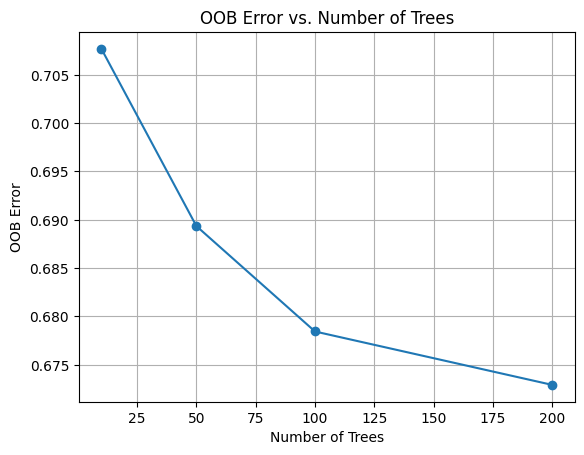

In [ ]:
# n: Effect of Number of Trees

n_trees = [10, 50, 100, 200]
oob_errors = []

for n in n_trees:
    rf_n = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf_n.fit(X, y)
    oob_errors.append(1 - rf_n.oob_score_)

plt.plot(n_trees, oob_errors, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error vs. Number of Trees")
plt.grid(True)
plt.show()